In [1]:
'''
Let's say that you're asked to perform hierarchical clustering analysis on a new dataset - how would we go about it?
We're going to be using a dataset that details language skills from different European countries. We will perform a 
hierarchical clustering analysis on this dataset. You might be faced with a situation like this if you were asked 
to tackle demographic info or survey responses, so it's a useful test.
'''

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet

%matplotlib inline

In [2]:
# load the data
lang = pd.read_csv('lang.csv')
lang.head()

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


In [3]:
lang.shape

(16, 13)

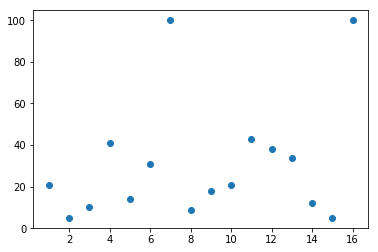

In [4]:
# scatter to guess clusters
plt.scatter(lang['country'], lang['english'])
plt.show()

In [5]:
# Now, let's convert our data to a matrix to pass to the clustering algorithm - the matrix makes it easier for our algorithm to compute distance:
X = lang.as_matrix(columns=None)

In [6]:
# We'll implement the actual clustering algorithm using the ward method:
Z = linkage(X, 'ward')

In [7]:
# We can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))

In [8]:
# let's 'c' how it did
c

0.66645925603242939

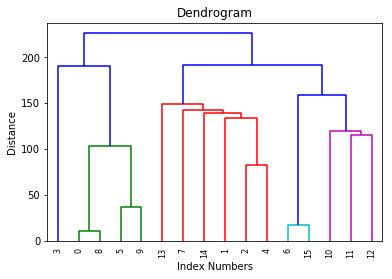

In [9]:
# now let's make our dendrogram
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

In [10]:
# we can see that no links exist above a distance of 200 - so we will set maximum distance at 200 and 
# use the fclusters function from scipy.cluster.hierarchy, which will return our cluster ID's.
max_dist = 200
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

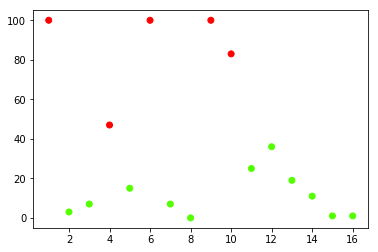

In [11]:
# Let's plot our data and assign the class labels as the color:
plt.scatter(X[:,0], X[:,6], c=clusters, cmap='prism')
plt.show()

# Iris dendrogram

In [12]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [17]:
df=pd.read_csv('/Users/elutins/Downloads/iris.csv')

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]

In [21]:
X_scaled = StandardScaler().fit_transform(X)

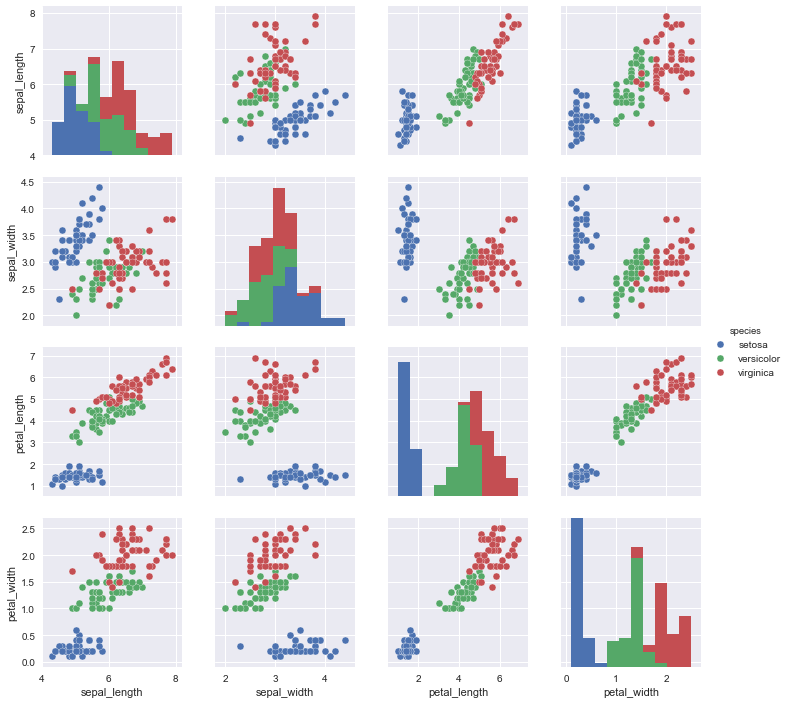

In [23]:
sns.pairplot(df, hue='species')

In [24]:
link = linkage(X_scaled, 'single')

In [25]:
c, coph_dists = cophenet(link, pdist(X_scaled))

In [26]:
c

0.82808817602875184

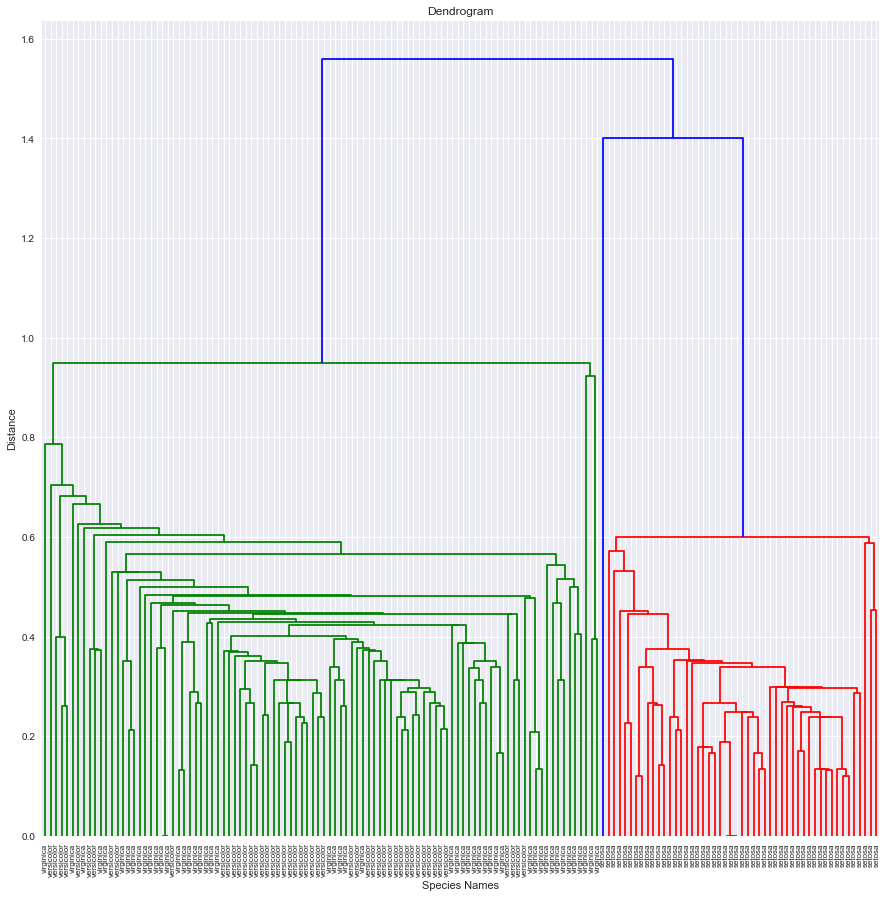

In [28]:
plt.figure(figsize=(15,15))
plt.title('Dendrogram')
plt.xlabel('Species Names')
plt.ylabel('Distance')
dendrogram(
    link,
    leaf_rotation=90.,
    leaf_font_size=8.,
    labels = np.array(df['species']),
)
plt.show()